In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy
import urllib.request
import random 
# Import API key
from apikeys import api_key

# Incorporated citipy to determine city based on latitude and longitude


# Output File (CSV)
output_data_file = "output_data\cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [39]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [40]:
# OpenWeatherMap API Key
api_key = "c7c131cd9010beca634f2aa7ad60cbc7"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pisco
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | itoman
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | nicoya
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | vostok
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | naryan-mar
Processing Record 14 of Set 1 | hit
Processing Record 15 of Set 1 | samusu
City not found. Skipping...
Processing Record 16 of Set 1 | mangaratiba
Processing Record 17 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 18 of Set 1 | biltine
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | miraflores
Processing Reco

Processing Record 33 of Set 4 | winneba
Processing Record 34 of Set 4 | yushu
Processing Record 35 of Set 4 | fairbanks
Processing Record 36 of Set 4 | kagalnik
City not found. Skipping...
Processing Record 37 of Set 4 | laguna
Processing Record 38 of Set 4 | illapel
Processing Record 39 of Set 4 | archidona
Processing Record 40 of Set 4 | dingle
Processing Record 41 of Set 4 | kimbe
Processing Record 42 of Set 4 | guaraniacu
Processing Record 43 of Set 4 | vestmannaeyjar
Processing Record 44 of Set 4 | cabo san lucas
Processing Record 45 of Set 4 | mecca
Processing Record 46 of Set 4 | tevriz
Processing Record 47 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 48 of Set 4 | dagda
Processing Record 49 of Set 4 | saint george
Processing Record 0 of Set 5 | leningradskiy
Processing Record 1 of Set 5 | santa fe
Processing Record 2 of Set 5 | bada
Processing Record 3 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 5 | trincomalee
Pro

Processing Record 20 of Set 8 | isangel
Processing Record 21 of Set 8 | soanierana ivongo
Processing Record 22 of Set 8 | huarmey
Processing Record 23 of Set 8 | san quintin
Processing Record 24 of Set 8 | tecoanapa
Processing Record 25 of Set 8 | puqi
Processing Record 26 of Set 8 | west plains
Processing Record 27 of Set 8 | yuanping
Processing Record 28 of Set 8 | oistins
Processing Record 29 of Set 8 | vanimo
Processing Record 30 of Set 8 | longyearbyen
Processing Record 31 of Set 8 | fougamou
Processing Record 32 of Set 8 | palmer
Processing Record 33 of Set 8 | ust-kuyga
Processing Record 34 of Set 8 | trinidad
Processing Record 35 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 36 of Set 8 | lander
Processing Record 37 of Set 8 | bataipora
Processing Record 38 of Set 8 | casablanca
Processing Record 39 of Set 8 | hambantota
Processing Record 40 of Set 8 | clyde river
Processing Record 41 of Set 8 | haines junction
Processing Record 42 of Set 8 | nieves
Proce

Processing Record 6 of Set 12 | ardakan
Processing Record 7 of Set 12 | prince rupert
Processing Record 8 of Set 12 | qaanaaq
Processing Record 9 of Set 12 | slonim
Processing Record 10 of Set 12 | lolua
City not found. Skipping...
Processing Record 11 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 12 of Set 12 | padre bernardo
City not found. Skipping...
Processing Record 13 of Set 12 | fukue
Processing Record 14 of Set 12 | antofagasta
Processing Record 15 of Set 12 | sur
Processing Record 16 of Set 12 | warqla
City not found. Skipping...
Processing Record 17 of Set 12 | nouadhibou
Processing Record 18 of Set 12 | nelson bay
Processing Record 19 of Set 12 | tupik
Processing Record 20 of Set 12 | broome
Processing Record 21 of Set 12 | asilah
City not found. Skipping...
Processing Record 22 of Set 12 | wernigerode
Processing Record 23 of Set 12 | flinders
Processing Record 24 of Set 12 | tessalit
Processing Record 25 of Set 12 | porto velho
Processing Record 26 

In [41]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
#city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()


City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [42]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pisco,0,PE,1569113563,30,-13.71,-76.20,71.6,8.05
1,ushuaia,90,AR,1569113564,99,-54.81,-68.31,33.8,12.75
2,vaini,40,IN,1569113564,94,15.34,74.49,69.8,2.39
3,itoman,75,JP,1569113564,78,26.12,127.67,80.6,21.92
4,avarua,100,CK,1569113564,88,-21.21,-159.78,71.6,2.24


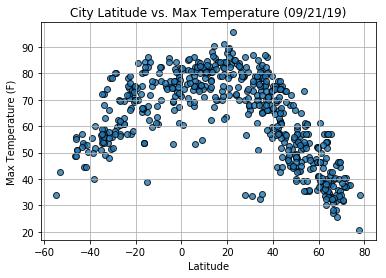

In [43]:
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


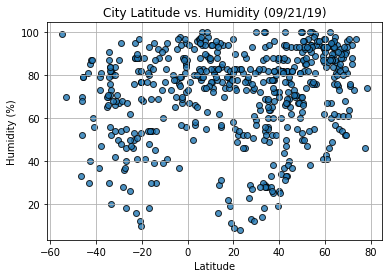

In [44]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


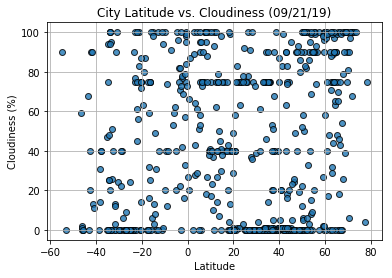

In [45]:
# Build the scatter plots for latitude vs. cloudiness plot
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


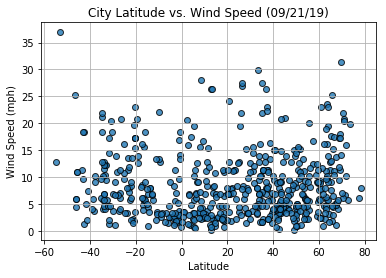

In [46]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()
